In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

In [3]:
data_fenics = np.load("C:\\Users\\gameh\\Documents\\codes\\kt_matmodel_2025\\Task_1\\solution_fenics.npz")
coords_fenics = data_fenics["coords"]
values_fenics = data_fenics["values"]

In [4]:
data_deepxde = np.load("C:\\Users\\gameh\\Documents\\codes\\kt_matmodel_2025\\Task_1\\solution_deepxde.npz")
X_test_deepxde, Y_test_deepxde, u_pred_deepxde = data_deepxde["X"], data_deepxde["Y"], data_deepxde["u"]

In [5]:
data_torch_1 = np.load("C:\\Users\\gameh\\Documents\\codes\\kt_matmodel_2025\\Task_1\\solution_torch_1.npz")
X_test_torch_1, Y_test_torch_1, u_pred_torch_1 = data_torch_1["X"], data_torch_1["Y"], data_torch_1["u"]

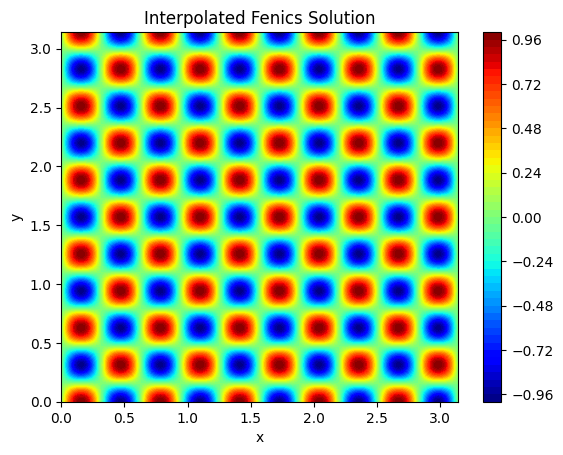

In [13]:
grid_x = np.linspace(coords_fenics[:, 0].min(), coords_fenics[:, 0].max(), 1000)
grid_y = np.linspace(coords_fenics[:, 1].min(), coords_fenics[:, 1].max(), 1000)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)

# Интерполяция значений на регулярную сетку
grid_values = griddata(coords_fenics, values_fenics, (grid_X, grid_Y), method='cubic')

# Построение графика с contourf
plt.contourf(grid_X, grid_Y, grid_values, levels=50, cmap='jet')
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated Fenics Solution")
plt.show()

In [8]:
x = np.linspace(0, np.pi, 1000)
y = np.linspace(0, np.pi, 1000)
X, Y = np.meshgrid(x, y, indexing='ij')

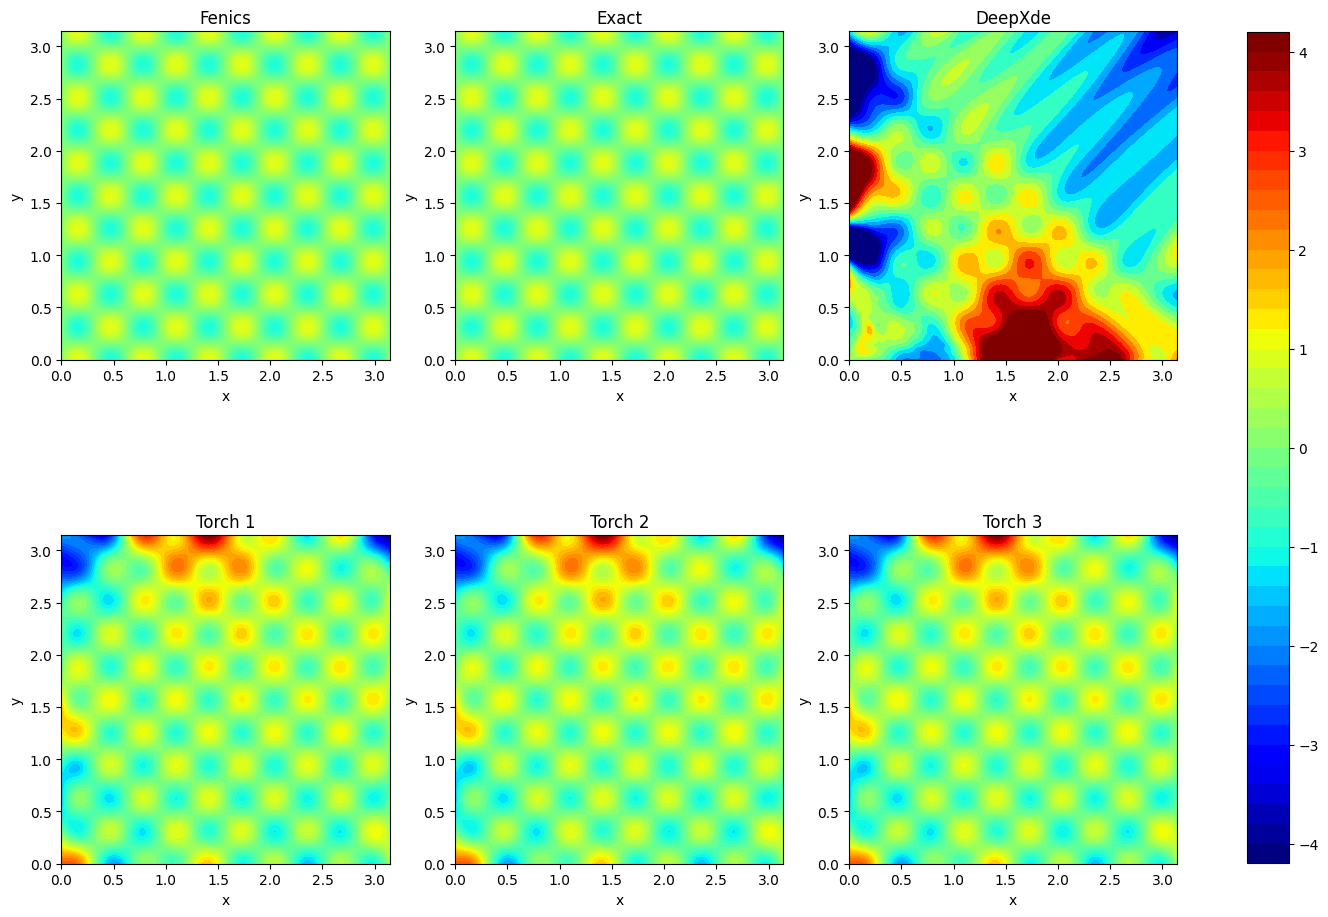

In [10]:
vmin = min(
    np.nanmin(grid_values), np.nanmin(np.sin(10 * X)), #np.nanmin(u_pred_deepxde), 
    np.nanmin(u_pred_torch_1), np.nanmin(u_pred_torch_1), np.nanmin(u_pred_torch_1)
)
vmax = max(
    np.nanmax(grid_values), np.nanmax(np.sin(10 * X)), #np.nanmax(u_pred_deepxde), 
    np.nanmax(u_pred_torch_1), np.nanmax(u_pred_torch_1), np.nanmax(u_pred_torch_1)
)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

pcm1 = axs[0, 0].contourf(grid_X, grid_Y, grid_values, levels=50, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 0].set_aspect('equal')
axs[0, 0].set_title("Fenics")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

pcm2 = axs[0, 1].contourf(X, Y, np.sin(10 * X) * np.cos(10 * Y), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[0, 1].set_aspect('equal')
axs[0, 1].set_title("Exact")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")

pcm3 = axs[0, 2].contourf(X_test_deepxde, Y_test_deepxde, u_pred_deepxde, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[0, 2].set_aspect('equal')
axs[0, 2].set_title("DeepXde")
axs[0, 2].set_xlabel("x")
axs[0, 2].set_ylabel("y")

pcm4 = axs[1, 0].contourf(X_test_torch_1, Y_test_torch_1, u_pred_torch_1, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 0].set_aspect('equal')
axs[1, 0].set_title("Torch 1")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

pcm5 = axs[1, 1].contourf(X_test_torch_1, Y_test_torch_1, u_pred_torch_1, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 1].set_aspect('equal')
axs[1, 1].set_title("Torch 2")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")

pcm6 = axs[1, 2].contourf(X_test_torch_1, Y_test_torch_1, u_pred_torch_1, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 2].set_aspect('equal')
axs[1, 2].set_title("Torch 3")
axs[1, 2].set_xlabel("x")
axs[1, 2].set_ylabel("y")

fig.colorbar(pcm6, ax=axs[:, :], shrink=0.9)

plt.show()

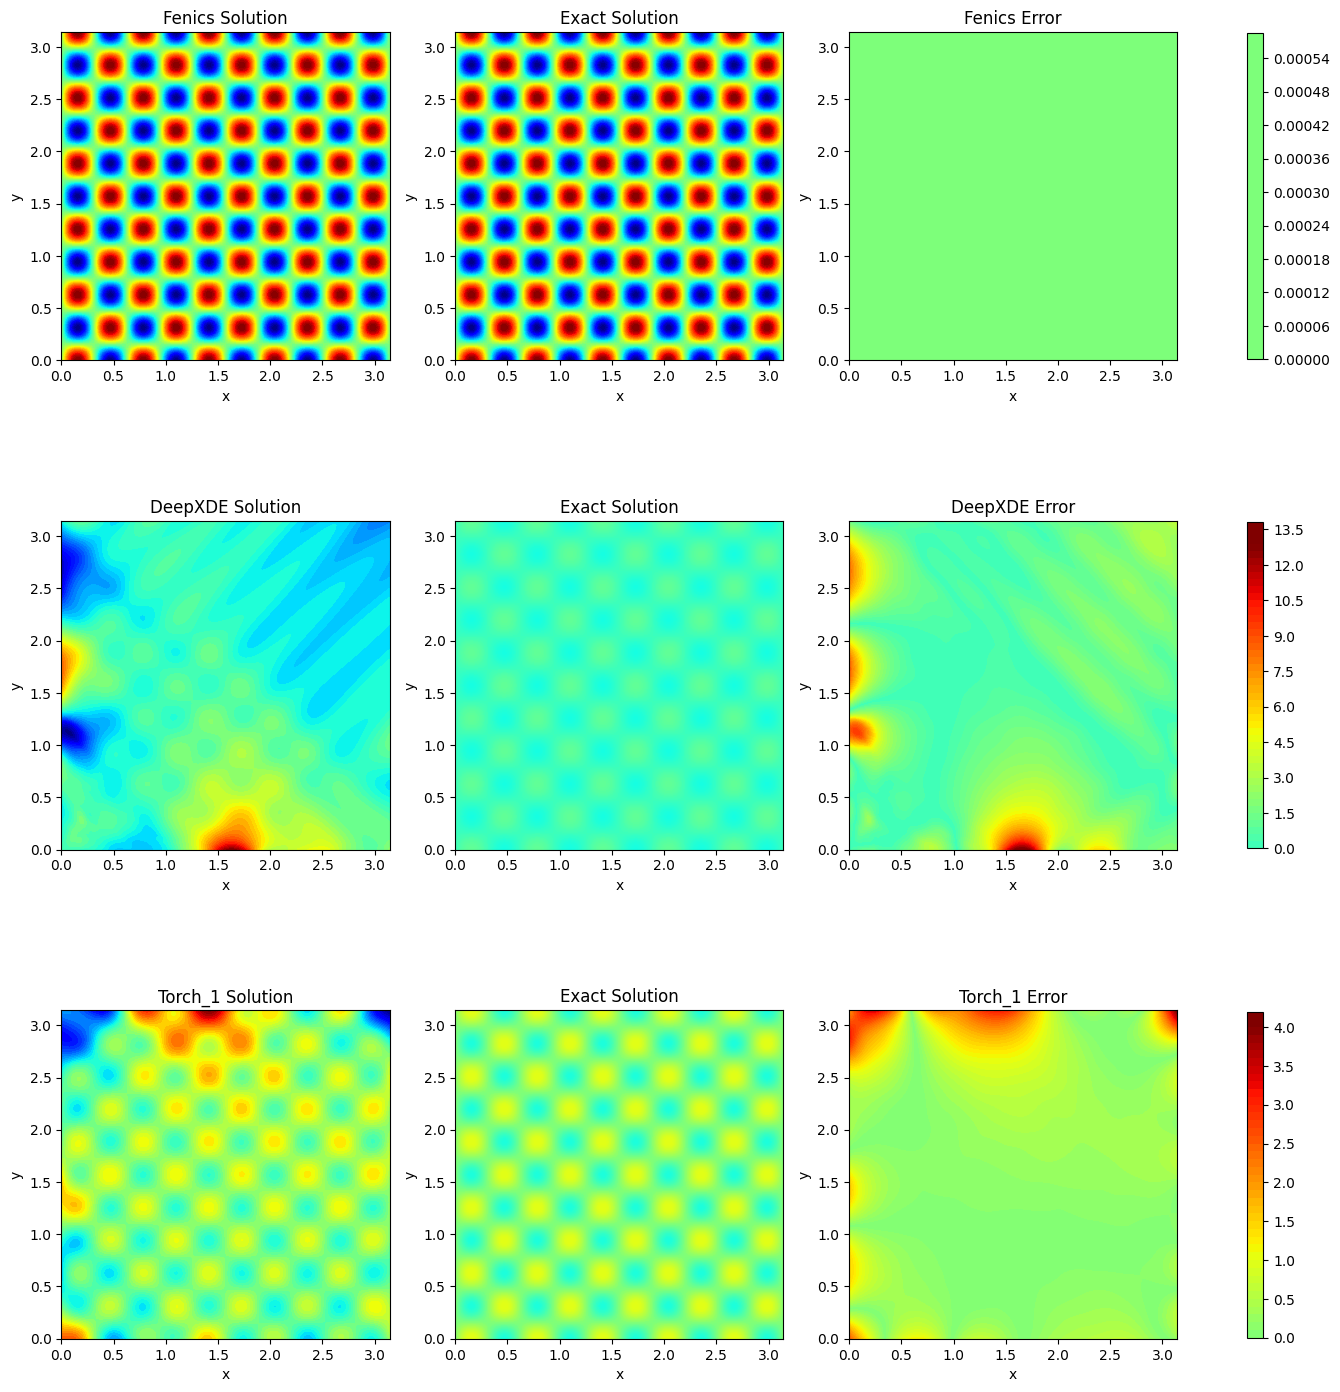

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

vmin = min(
    np.nanmin(grid_values), np.nanmin(np.sin(10 * X) * np.cos(10 * Y))
)
vmax = max(
    np.nanmax(grid_values), np.nanmax(np.sin(10 * X) * np.cos(10 * Y))
)

pcm1 = axs[0, 0].contourf(grid_X, grid_Y, grid_values, levels=50, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 0].set_title("Fenics Solution")

pcm2 = axs[0, 1].contourf(grid_X, grid_Y, np.sin(10 * grid_X) * np.cos(10 * grid_Y), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[0, 1].set_title("Exact Solution")

pcm3 = axs[0, 2].contourf(grid_X, grid_Y, np.abs(grid_values - np.sin(10 * grid_X) * np.cos(10 * grid_Y)), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[0, 2].set_title("Fenics Error")
fig.colorbar(pcm3, ax=axs[0, :3], shrink=0.8)

vmin = min(
    np.nanmin(np.sin(10 * X) * np.cos(10 * Y)),
    np.nanmin(u_pred_deepxde)
)
vmax = max(
    np.nanmax(np.sin(10 * X) * np.cos(10 * Y)),
    np.nanmax(u_pred_deepxde)
)

pcm4 = axs[1, 0].contourf(X_test_deepxde, Y_test_deepxde, u_pred_deepxde, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 0].set_title("DeepXDE Solution")

pcm5 = axs[1, 1].contourf(X_test_deepxde, Y_test_deepxde, np.sin(10 * X_test_deepxde) * np.cos(10 * Y_test_deepxde), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 1].set_title("Exact Solution")

pcm6 = axs[1, 2].contourf(X_test_deepxde, Y_test_deepxde, np.abs(u_pred_deepxde - np.sin(10 * X_test_deepxde) * np.cos(10 * Y_test_deepxde)), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[1, 2].set_title("DeepXDE Error")
fig.colorbar(pcm6, ax=axs[1, :3], shrink=0.8)

vmin = min(
    np.nanmin(np.sin(10 * X) * np.cos(10 * Y)),
    np.nanmin(u_pred_torch_1)
)
vmax = max(
    np.nanmax(np.sin(10 * X) * np.cos(10 * Y)),
    np.nanmax(u_pred_torch_1)
)

pcm7 = axs[2, 0].contourf(X_test_torch_1, Y_test_torch_1, u_pred_torch_1, levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[2, 0].set_title("Torch_1 Solution")

pcm8 = axs[2, 1].contourf(X_test_torch_1, Y_test_torch_1, np.sin(10 * X_test_torch_1) * np.cos(10 * Y_test_torch_1), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[2, 1].set_title("Exact Solution")

pcm9 = axs[2, 2].contourf(X_test_torch_1, Y_test_torch_1, np.abs(u_pred_torch_1 - np.sin(10 * X_test_torch_1) * np.cos(10 * Y_test_torch_1)), levels=50, cmap="jet", vmin=vmin, vmax=vmax)
axs[2, 2].set_title("Torch_1 Error")
fig.colorbar(pcm9, ax=axs[2, :3], shrink=0.8)

# Общая настройка
for ax in axs.flat:
    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.show()